In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
sns.set_palette("muted")
from warnings import filterwarnings
filterwarnings("ignore")

# Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
bank_df = pd.read_csv("Clustering/bank_marketing_part1_Data.csv")

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


<b> Data Dictionary for Market Segmentation

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


In [4]:
bank_df.shape

(210, 7)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
round(bank_df.describe(),2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.72,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.68,4.03,8.46,6.55


In [7]:
a = np.arange(0,7)
bank_df_columns = bank_df.columns
for i in a: 
    print("skewness of {} is".format(bank_df_columns[i]),bank_df[bank_df_columns[i]].skew())
    print("Kurtosis of {} is".format(bank_df_columns[i]),bank_df[bank_df_columns[i]].kurtosis())
    print('\n')

skewness of spending is 0.3998891917177586
Kurtosis of spending is -1.084265946732132


skewness of advance_payments is 0.3865727731912213
Kurtosis of advance_payments is -1.1067032394403977


skewness of probability_of_full_payment is -0.5379537283982823
Kurtosis of probability_of_full_payment is -0.1403145959884311


skewness of current_balance is 0.5254815601318906
Kurtosis of current_balance is -0.7856445331894002


skewness of credit_limit is 0.1343782451316215
Kurtosis of credit_limit is -1.0976974225420741


skewness of min_payment_amt is 0.40166734329025183
Kurtosis of min_payment_amt is -0.06660330380841506


skewness of max_spent_in_single_shopping is 0.561897374954866
Kurtosis of max_spent_in_single_shopping is -0.8407917195565342




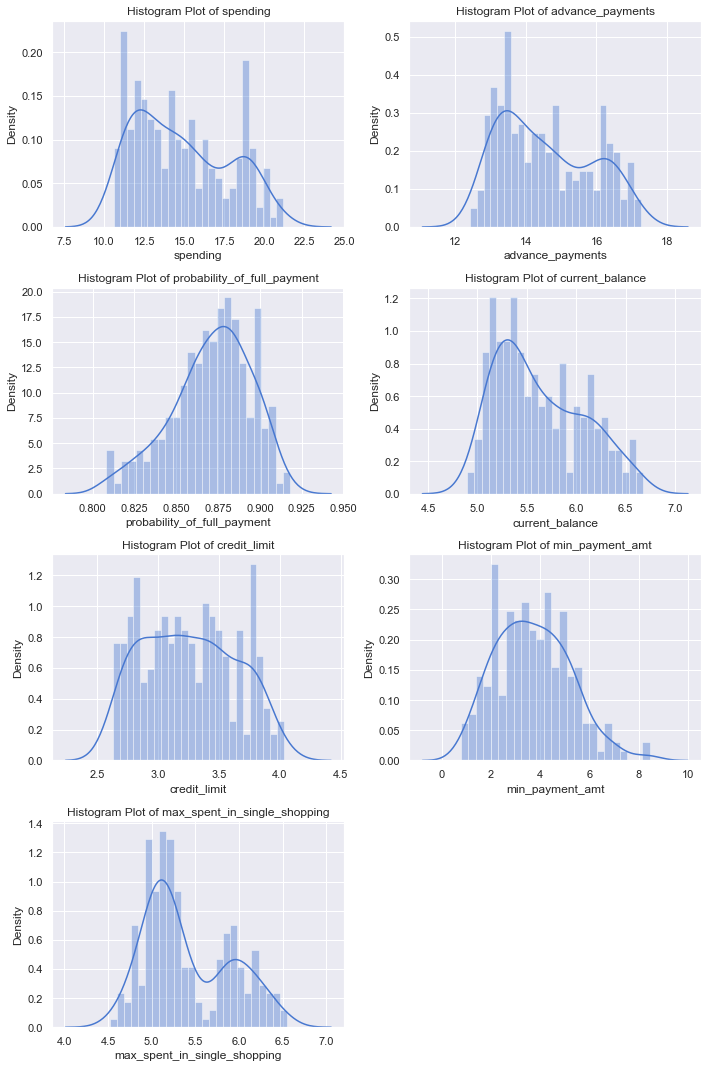

In [8]:
plt.figure(figsize=(10,15))
for i in a:
    plt.subplot(4,2,i+1);
    sns.distplot(bank_df[bank_df_columns[i]],bins=25);
    plt.title("Histogram Plot of {}".format(bank_df_columns[i]))
    plt.tight_layout();

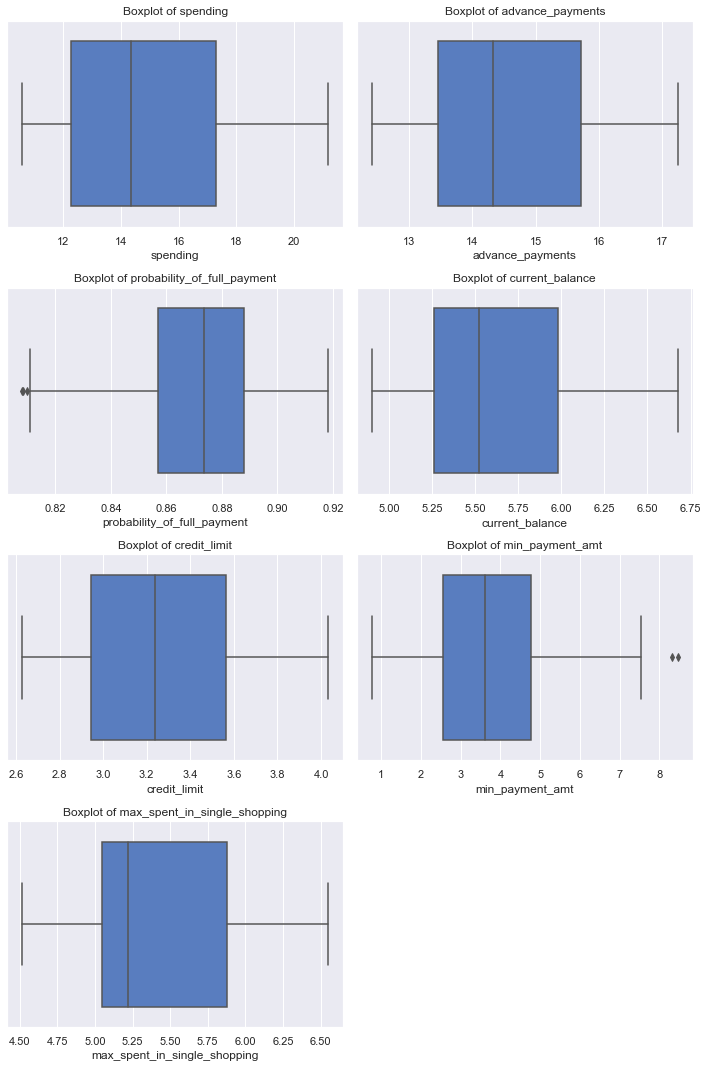

In [9]:
plt.figure(figsize=(10,15))
for i in a:
    plt.subplot(4,2,i+1);
    sns.boxplot(bank_df[bank_df_columns[i]]);
    plt.title("Boxplot of {}".format(bank_df_columns[i]))
    plt.tight_layout();

In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [11]:
lr_prob,ur_prob=remove_outlier(bank_df['probability_of_full_payment'])
print("lower range",lr_prob, "and upper range", ur_prob)

lower range 0.8105875 and upper range 0.9340875


In [12]:
lr_min,ur_min=remove_outlier(bank_df['min_payment_amt'])
print("lower range",lr_min, "and upper range", ur_min)

lower range -0.7493749999999992 and upper range 8.079625


In [13]:
bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']>ur_prob,ur_prob,bank_df['probability_of_full_payment'])
bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']<lr_prob,lr_prob,bank_df['probability_of_full_payment'])
bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']>ur_min,ur_min,bank_df['min_payment_amt'])
bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']<lr_min,lr_min,bank_df['min_payment_amt'])

Text(0.5, 1.0, 'Boxplot of probability_of_full_payment')

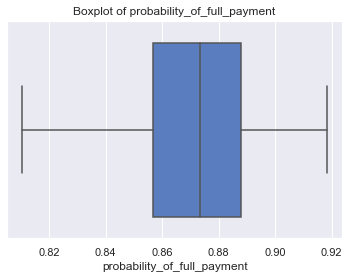

In [14]:
sns.boxplot(bank_df["probability_of_full_payment"]);
plt.title("Boxplot of {}".format("probability_of_full_payment"))

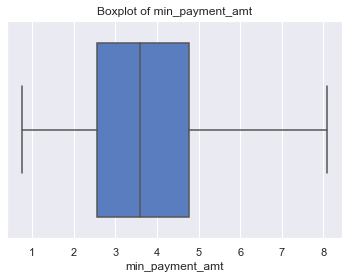

In [15]:
sns.boxplot(bank_df["min_payment_amt"]);
plt.title("Boxplot of {}".format("min_payment_amt"));

<Figure size 720x1080 with 0 Axes>

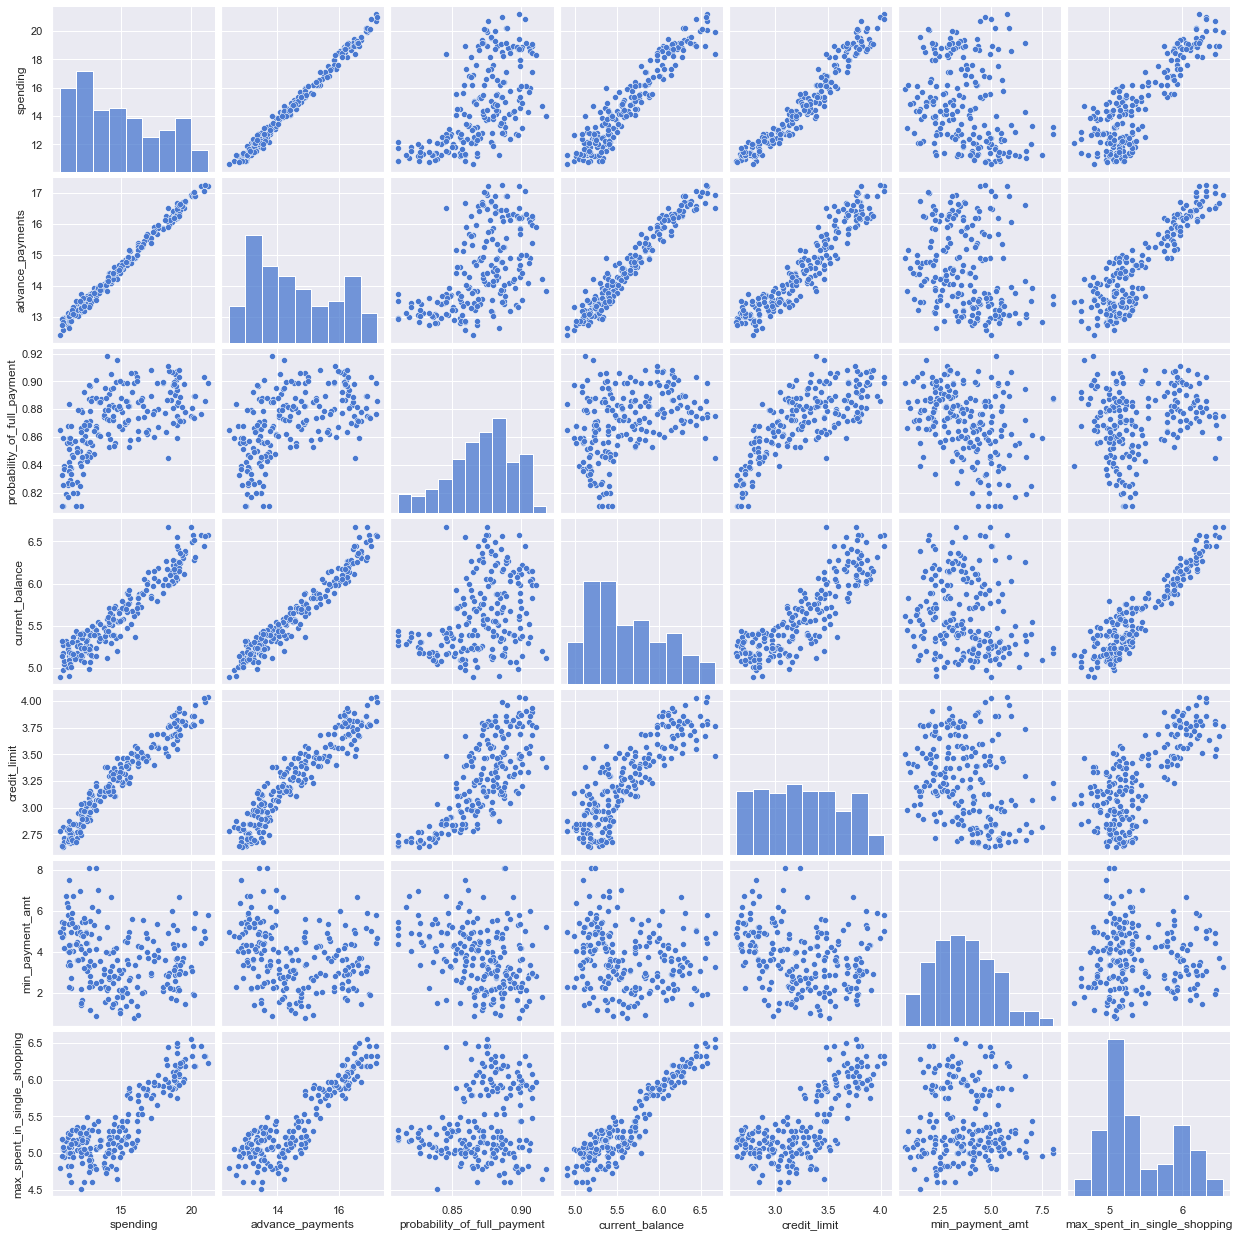

In [16]:
plt.figure(figsize=(10,15));
sns.pairplot(bank_df);

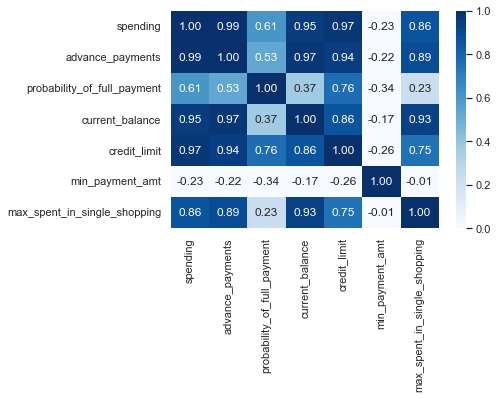

In [17]:
sns.heatmap(bank_df.corr(), annot=True, fmt='.2f', cmap='Blues',vmin=0,
    vmax=1);

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = StandardScaler()

In [20]:
scaled_data = X.fit_transform(bank_df)
scaled_df = round(pd.DataFrame(scaled_data, columns=bank_df_columns),2)

In [21]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.75,1.81,0.18,2.37,1.34,-0.30,2.33
1,0.39,0.25,1.51,-0.60,0.86,-0.24,-0.54
2,1.41,1.43,0.51,1.40,1.32,-0.22,1.51
3,-1.38,-1.23,-2.57,-0.79,-1.64,1.00,-0.45
4,1.08,1.00,1.20,0.59,1.16,-1.09,0.87


In [22]:
round(scaled_df.describe(),3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000,210.000,210.000,210.000,210.000,210.000,210.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.003,1.002,1.002
min,-1.470,-1.650,-2.570,-1.650,-1.670,-1.970,-1.810
25%,-0.888,-0.850,-0.602,-0.830,-0.832,-0.762,-0.740
50%,-0.165,-0.185,0.105,-0.240,-0.055,-0.070,-0.380
75%,0.845,0.888,0.715,0.798,0.808,0.718,0.960
max,2.180,2.070,2.010,2.370,2.060,2.940,2.330


In [23]:
scaled_df.shape

(210, 7)

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
wardlink = linkage(scaled_df, method = 'ward')

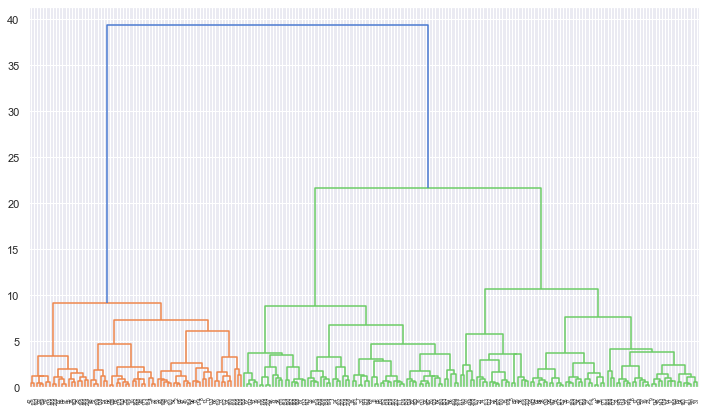

In [26]:
plt.figure(figsize=(12,7))
dend = dendrogram(wardlink)

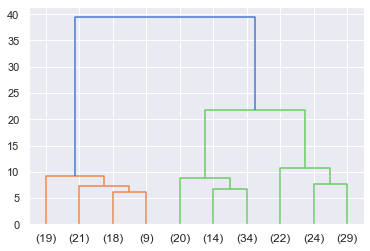

In [27]:
dend = dendrogram(wardlink,truncate_mode='lastp',p = 10)

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 2], dtype=int32)

In [30]:
bank_df['clusters'] = clusters

In [31]:
bank_df['clusters'].value_counts()

3    75
2    68
1    67
Name: clusters, dtype: int64

In [32]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [33]:
bank_df.to_csv('hc.csv')

In [34]:
from sklearn.cluster import KMeans 

In [35]:
wss=[]

In [36]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [37]:
wss

[1469.9368528571413,
 659.1799789473688,
 430.14101744767953,
 370.6105094075226,
 327.25767554879286,
 289.5001444012548,
 262.48991650405674,
 241.39837086596742,
 220.2219973417952,
 203.44122087610518]

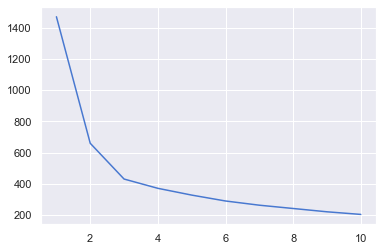

In [38]:
plt.plot(range(1,11), wss);

In [39]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [40]:
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [41]:
bank_df_kmeans = bank_df.copy()

In [42]:
bank_df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [43]:
bank_df_kmeans.drop(["clusters"], axis=1,inplace=True)

In [44]:
bank_df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [45]:
bank_df_kmeans["labels"]=labels

In [46]:
bank_df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,labels
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2


In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
silhouette_score(scaled_df,labels)

0.4009683555743118

In [49]:
sil_width = silhouette_samples(scaled_df,labels)
len(sil_width)

210

In [50]:
bank_df_kmeans["sil_width"] = sil_width
bank_df_kmeans.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,labels,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2,0.573216
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.365888
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2,0.637218
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.515754
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2,0.360449


In [51]:
bank_df_kmeans["sil_width"].min()

0.003088621681530165

In [52]:
bank_df_kmeans.to_csv('km.csv')

# ML

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [54]:
ins_df = pd.read_csv("CART, RF & ANN/insurance_part2_data.csv")

In [55]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [56]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [57]:
ins_df["Agency_Code"].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [58]:
ins_df["Type"].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [59]:
ins_df["Claimed"].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [60]:
ins_df["Channel"].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [61]:
ins_df["Product Name"].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [62]:
ins_df["Destination"].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [63]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes

In [64]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [65]:
ins_df["Agency_Code"].value_counts()

2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64

In [66]:
ins_df["Type"].value_counts()

1    1837
0    1163
Name: Type, dtype: int64

In [67]:
ins_df["Claimed"].value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [68]:
ins_df["Channel"].value_counts()

1    2954
0      46
Name: Channel, dtype: int64

In [69]:
ins_df["Product Name"].value_counts()

2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64

In [70]:
ins_df["Destination"].value_counts()

0    2465
1     320
2     215
Name: Destination, dtype: int64

In [71]:
round(ins_df.describe(),2)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,38.09,1.31,0.61,0.31,14.53,0.98,70.00,60.25,1.66,0.25
std,10.46,0.99,0.49,0.46,25.48,0.12,134.05,70.73,1.26,0.58
min,8.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00
25%,32.00,0.00,0.00,0.00,0.00,1.00,11.00,20.00,1.00,0.00
50%,36.00,2.00,1.00,0.00,4.63,1.00,26.50,33.00,2.00,0.00
75%,42.00,2.00,1.00,1.00,17.24,1.00,63.00,69.00,2.00,0.00
max,84.00,3.00,1.00,1.00,210.21,1.00,4580.00,539.00,4.00,2.00


In [72]:
ins_df[ins_df["Duration"]<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,3,0,0,6.3,1,-1,18.0,0,0


In [73]:
ins_df.drop(1508,inplace=True)

In [74]:
ins_df[ins_df["Duration"]<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [75]:
round(ins_df.describe(),2)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2999.00,2999.00,2999.00,2999.00,2999.00,2999.00,2999.00,2999.00,2999.00,2999.00
mean,38.10,1.31,0.61,0.31,14.53,0.98,70.03,60.26,1.66,0.25
std,10.46,0.99,0.49,0.46,25.49,0.12,134.07,70.74,1.26,0.58
min,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,0.00,0.00,0.00,0.00,1.00,11.00,20.00,1.00,0.00
50%,36.00,2.00,1.00,0.00,4.63,1.00,27.00,33.00,2.00,0.00
75%,42.00,2.00,1.00,1.00,17.24,1.00,63.00,69.00,2.00,0.00
max,84.00,3.00,1.00,1.00,210.21,1.00,4580.00,539.00,4.00,2.00


In [76]:
df_conti = ins_df[["Age","Commision","Duration","Sales"]]

In [77]:
df_conti.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


In [78]:
df_cate = ins_df[["Agency_Code","Type","Claimed","Channel","Product Name","Destination"]]

In [79]:
df_cate.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,0,0,0,1,2,0
1,2,1,0,1,2,0
2,1,1,0,1,2,1
3,2,1,0,1,1,0
4,3,0,0,1,0,0


In [80]:
b = np.arange(0,4)
df_conti_columns = df_conti.columns
for i in b: 
    print("skewness of {} is".format(df_conti_columns[i]),df_conti[df_conti_columns[i]].skew())
    print("Kurtosis of {} is".format(df_conti_columns[i]),df_conti[df_conti_columns[i]].kurtosis())
    print('\n')

skewness of Age is 1.1498235257674108
Kurtosis of Age is 1.6526957200319385


skewness of Commision is 3.1481857536856355
Kurtosis of Commision is 13.978991016589047


skewness of Duration is 13.783839843720399
Kurtosis of Duration is 427.51542574170816


skewness of Sales is 2.3806502777537486
Kurtosis of Sales is 6.152436902107649




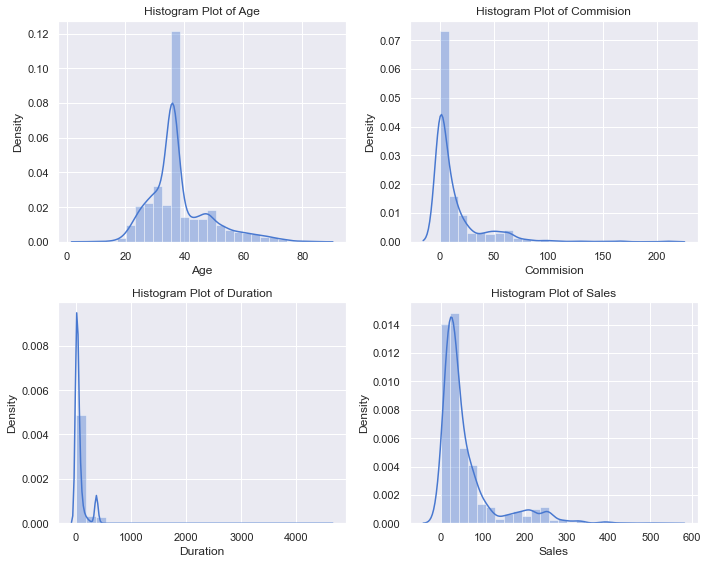

In [81]:
b = np.arange(0,4)
df_conti_columns = df_conti.columns

plt.figure(figsize=(10,8))
for i in b:
    plt.subplot(2,2,i+1);
    sns.distplot(df_conti[df_conti_columns[i]],bins=25);
    plt.title("Histogram Plot of {}".format(df_conti_columns[i]))
    plt.tight_layout();

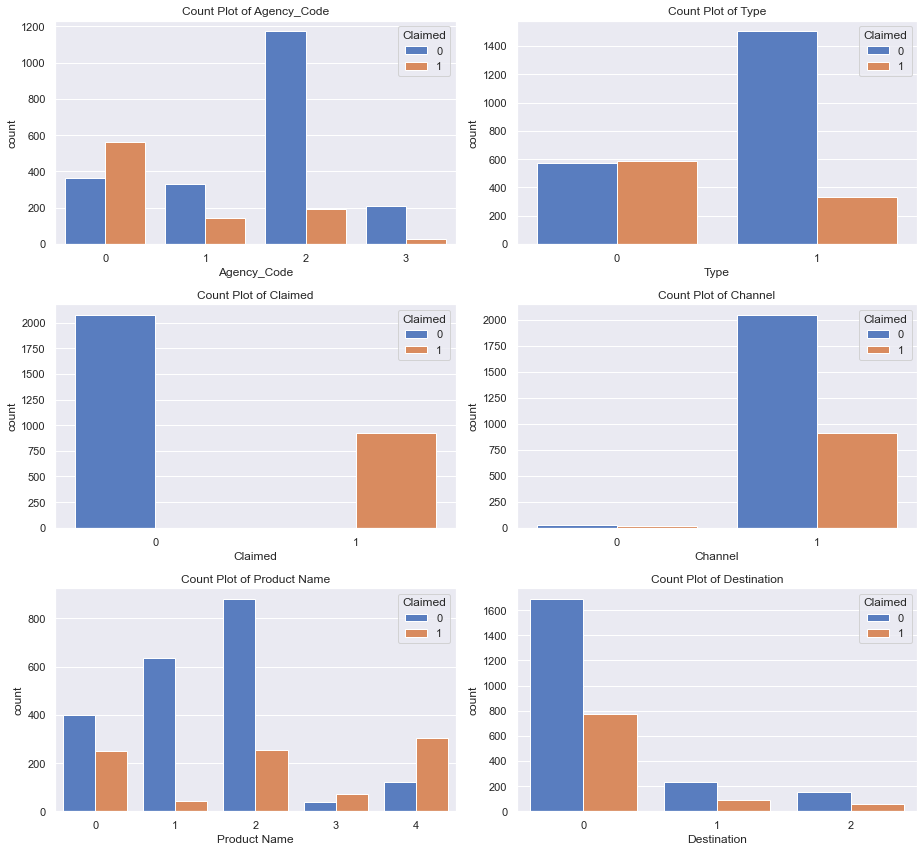

In [82]:
c = np.arange(0,6)
df_cate_columns = df_cate.columns

plt.figure(figsize=(13,12))
for i in c:
    plt.subplot(3,2,i+1);
    sns.countplot(df_cate[df_cate_columns[i]], hue=df_cate["Claimed"]);
    plt.title("Count Plot of {}".format(df_cate_columns[i]))
    plt.tight_layout();

In [83]:
ins_df["Claimed"].value_counts(normalize=True)

0    0.691897
1    0.308103
Name: Claimed, dtype: float64

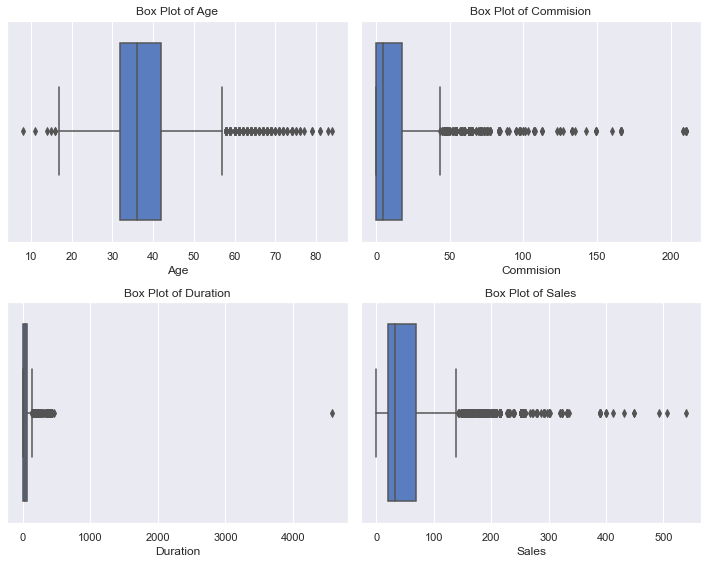

In [84]:
b = np.arange(0,4)
df_conti_columns = df_conti.columns

plt.figure(figsize=(10,8))
for i in b:
    plt.subplot(2,2,i+1);
    sns.boxplot(df_conti[df_conti_columns[i]]);
    plt.title("Box Plot of {}".format(df_conti_columns[i]))
    plt.tight_layout();

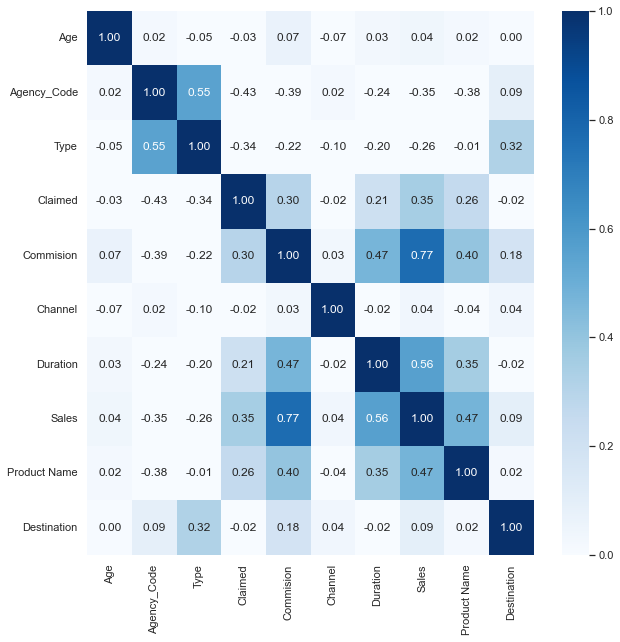

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(ins_df.corr(), annot=True, fmt='.2f', cmap='Blues',vmin=0,vmax=1);

In [86]:
X = ins_df.drop("Claimed" , axis=1)

y = ins_df.pop("Claimed")

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

<b>Decision Tree Classifier

In [88]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [89]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [90]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ins_Tree_File = open('ins_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=ins_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

ins_Tree_File.close()

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [92]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [93]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 75}

In [94]:
best_grid = grid_search.best_estimator_

In [95]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1465
           1       0.70      0.56      0.62       634

    accuracy                           0.80      2099
   macro avg       0.76      0.73      0.74      2099
weighted avg       0.79      0.80      0.79      2099



In [98]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       610
           1       0.68      0.46      0.55       290

    accuracy                           0.76       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [99]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [15, 20, 25, 30, 35],
    'min_samples_split': [45, 60, 75, 90,120]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [100]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [15, 20, 25, 30, 35],
                         'min_samples_split': [45, 60, 75, 90, 120]})

In [101]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 120}

In [102]:
best_grid = grid_search.best_estimator_

In [103]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [104]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1465
           1       0.65      0.63      0.64       634

    accuracy                           0.79      2099
   macro avg       0.75      0.74      0.74      2099
weighted avg       0.78      0.79      0.79      2099



In [105]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       610
           1       0.71      0.60      0.65       290

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [106]:
confusion_matrix(train_labels, ytrain_predict)

array([[1251,  214],
       [ 235,  399]], dtype=int64)

In [107]:
confusion_matrix(test_labels, ytest_predict)

array([[538,  72],
       [117, 173]], dtype=int64)

In [109]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.825


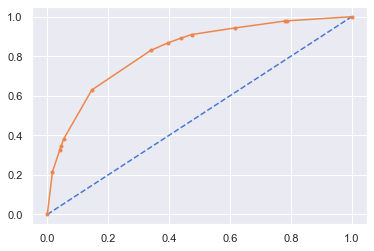

In [112]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [113]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.800


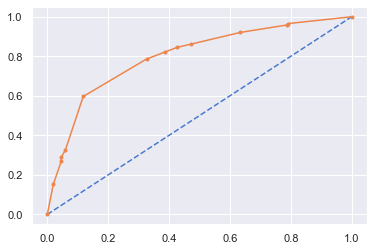

In [114]:
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<b>Random Forest

In [115]:
param_grid = {
    'max_depth': [7,8],
    'max_features': [6, 7],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [75, 90, 120],
    'n_estimators': [101, 301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)




In [116]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8], 'max_features': [6, 7],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [75, 90, 120],
                         'n_estimators': [101, 301, 501]})

In [117]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 90,
 'n_estimators': 501}

In [118]:
best_grid = grid_search.best_estimator_

In [119]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [120]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1465
           1       0.72      0.56      0.63       634

    accuracy                           0.80      2099
   macro avg       0.77      0.73      0.75      2099
weighted avg       0.80      0.80      0.79      2099



In [121]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       610
           1       0.74      0.48      0.58       290

    accuracy                           0.78       900
   macro avg       0.77      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900



In [122]:
confusion_matrix(train_labels, ytrain_predict)

array([[1327,  138],
       [ 277,  357]], dtype=int64)

In [123]:
confusion_matrix(test_labels, ytest_predict)

array([[562,  48],
       [151, 139]], dtype=int64)

In [124]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.849


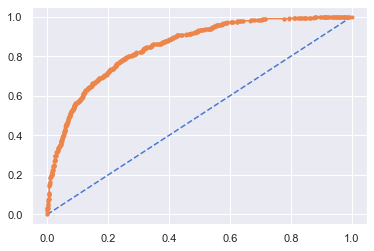

In [125]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [126]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.827


<b>Artificial Neural Network

In [134]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [135]:
param_grid = {
    'hidden_layer_sizes': [(100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01, 0.001],
    'max_iter' : [10000]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [136]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [137]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [138]:
best_grid = grid_search.best_estimator_

In [139]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [140]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1465
           1       0.68      0.48      0.56       634

    accuracy                           0.78      2099
   macro avg       0.74      0.69      0.71      2099
weighted avg       0.76      0.78      0.76      2099



In [141]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       610
           1       0.72      0.42      0.53       290

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.69       900
weighted avg       0.75      0.76      0.74       900



In [142]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.729


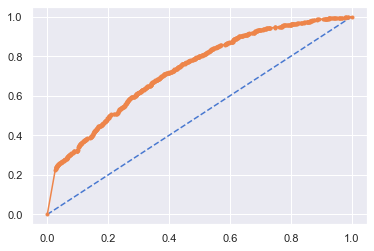

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [144]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.708


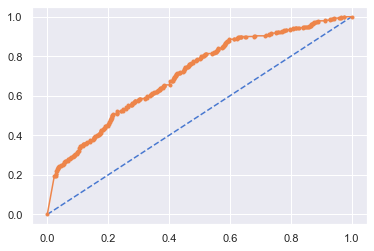

In [145]:
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [146]:
confusion_matrix(train_labels, ytrain_predict)

array([[1325,  140],
       [ 332,  302]], dtype=int64)

In [147]:
confusion_matrix(test_labels, ytest_predict)

array([[562,  48],
       [167, 123]], dtype=int64)

### END